<a href="https://colab.research.google.com/github/LeTrungDunggg/LeTrungDunggg/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt 
(x_train, y_train),(x_test,y_test) = mnist.load_data()

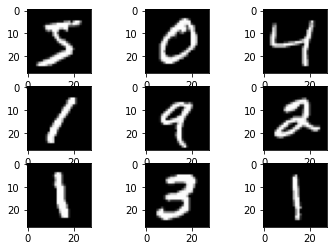

In [ ]:
for i in range (9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))       
plt.show()

In [ ]:
from keras.utils import np_utils
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train,10)
y_test= np_utils.to_categorical(y_test,10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import scale
from keras.layers import Dense,Activation,Dropout
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.backend import categorical_crossentropy
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

#translate model
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1,
                  validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=20)])


Epoch 1/500
375/375 [==============================] - 10s 23ms/step - loss: 0.2565 - accuracy: 0.9215 - val_loss: 0.1233 - val_accuracy: 0.9630
Epoch 2/500
375/375 [==============================] - 9s 23ms/step - loss: 0.0987 - accuracy: 0.9698 - val_loss: 0.0937 - val_accuracy: 0.9741
Epoch 3/500
375/375 [==============================] - 8s 22ms/step - loss: 0.0687 - accuracy: 0.9789 - val_loss: 0.0925 - val_accuracy: 0.9747
Epoch 4/500
375/375 [==============================] - 8s 22ms/step - loss: 0.0527 - accuracy: 0.9842 - val_loss: 0.0892 - val_accuracy: 0.9773
Epoch 5/500
375/375 [==============================] - 8s 21ms/step - loss: 0.0405 - accuracy: 0.9875 - val_loss: 0.0962 - val_accuracy: 0.9775
Epoch 6/500
375/375 [==============================] - 9s 25ms/step - loss: 0.0326 - accuracy: 0.9903 - val_loss: 0.0983 - val_accuracy: 0.9793
Epoch 7/500
375/375 [==============================] - 8s 22ms/step - loss: 0.0261 - accuracy: 0.9918 - val_loss: 0.1107 - val_accuracy

In [ ]:
y_pred= model.predict(x_test)
print(y_pred.flatten)
print(y_test)

<built-in method flatten of numpy.ndarray object at 0x7f9073c50d50>
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Test_loss : 0.16795721650123596
Test accuracy :  0.9819999933242798


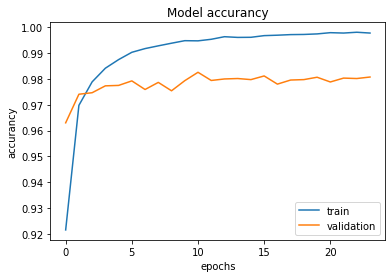

In [ ]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test_loss :',score[0])
print('Test accuracy : ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history. history['val_accuracy'])
plt.title('Model accurancy')
plt.ylabel('accurancy')
plt.xlabel('epochs')
plt.legend(['train','validation'])
plt.show()
